# Подлючение модулей

In [93]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score, roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Загрузка данных

In [224]:
# загружаем данные из файла в формате CSV, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
df = pd.read_csv('Churn_Modelling.csv', sep = ';')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### Описание данных

Признаки:
- RowNumber – индекс строки в данных
- CustomerId – уникальный идентификатор клиента
- Surname – фамилия
- CreditScore – кредитный рейтинг
- Geography – страна проживания
- Gender – пол
- Age – возраст
- Tenure – количество недвижимости у клиента
- Balance – баланс на счёте
- NumOfProducts -количество продуктов банка, используемых клиентом
- HasCrCard – наличие кредитной карты
- IsActiveMember – активность клиента
- EstimatedSalary – предполагаемая зарплата

Целевой (искомый) признак:
- Exited – факт ухода клиента

## Преобразование небинарных категориальных признаков в набор фиктивных бинарных

In [225]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Geography
geography_cols = pd.get_dummies(df["Geography"], dtype=int)
geography_cols.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


## Преобразование бинарных категориальных признаков

In [226]:
df['Gender']= df['Gender'].map({'Male':0, 'Female':1})

In [227]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


## Формирование дата-сета для обучения моделей

In [228]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary']

In [229]:
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[features_names], geography_cols], axis = 1)
X.shape

(10000, 12)

In [230]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['Exited']

## Modelling

In [231]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [232]:
# Выводим выборки
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6700, 12) (3300, 12) (6700,) (3300,)


## KNeighborsClassifier (Классификация ближайших соседей)

In [233]:
# метод k-ближайших соседей
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [234]:
# Сохраняем предсказание
knn_test_predict = knn.predict(X_test)

In [235]:
# Высчитываем долю правильно классифицированных объектов среди всех объектов
knn_accuracy = accuracy_score(y_test, knn_test_predict, normalize=True)
knn_accuracy

0.769090909090909

## Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [208]:
# метод Гаусса
gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [209]:
# Сохраняем предсказание
gnb_pred_test = gnb.predict(X_test)

In [210]:
# Высчитываем долю правильно классифицированных объектов среди всех объектов
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)
gnb_accuracy

0.793939393939394

## Logistic Regression (Логистическая регрессия)

In [157]:
# Метод логистической регрессии
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [158]:
# Сохраняем предсказание
lr_pred_test = lr.predict(X_test)

In [159]:
# Высчитываем долю правильно классифицированных объектов среди всех объектов
lr_accuracy = accuracy_score(y_test, lr_pred_test)
lr_accuracy

0.8115151515151515

## Random Forest Classifier (Классификатор дерева решений)

In [182]:
# Классификатор дерева решений
rfc  = RandomForestClassifier(criterion = 'gini',n_estimators = 100, max_depth = 9, random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_jobs=-1, random_state=42)

In [183]:
# Сохраняем предсказание
rfc_pred_test = rfc.predict(X_test)

In [184]:
# Высчитываем долю правильно классифицированных объектов среди всех объектов
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)
rfc_accuracy

0.8712121212121212

## Метрики классификации

In [236]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [237]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.769091
1,Gaussian Naive Bayes,0.793939
2,Random Forest Classifier,0.871212
3,Logistic Regression,0.811515


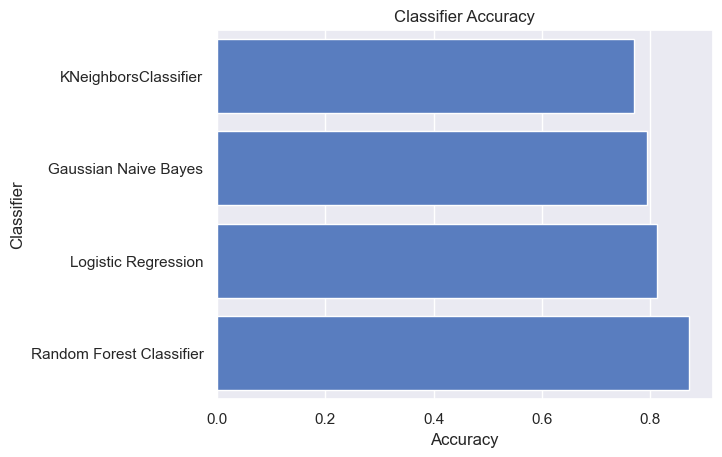

In [238]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

## KNeighborsClassifier

In [239]:
# performance measurement
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [240]:
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.815820895522388
test accuracy:  0.769090909090909


In [241]:
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))

test mean_squared_error:  0.2309090909090909
test mean_absolute_error:  0.2309090909090909


In [242]:
print('test precision_score: ', precision_score(y_test, y_test_predict))

test precision_score:  0.2551440329218107


In [243]:
print('test recall_score: ', recall_score(y_test, y_test_predict))

test recall_score:  0.09642301710730948


In [244]:
print('test f1_score: ', f1_score(y_test, y_test_predict))

test f1_score:  0.1399548532731377


### Полная информация

In [245]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2657
           1       0.26      0.10      0.14       643

    accuracy                           0.77      3300
   macro avg       0.53      0.51      0.50      3300
weighted avg       0.70      0.77      0.73      3300



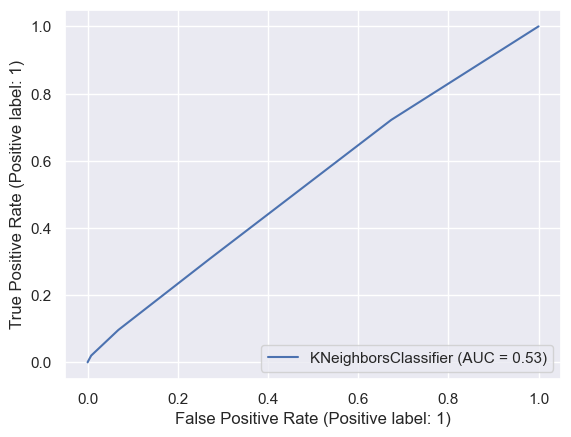

In [246]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

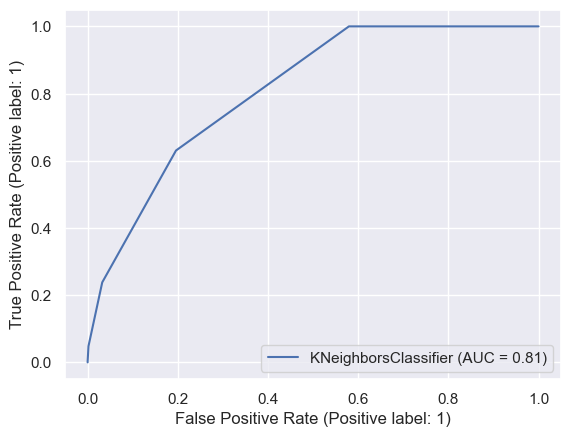

In [247]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_train, y_train)

In [248]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_predict, average='macro')

0.5141505375337074

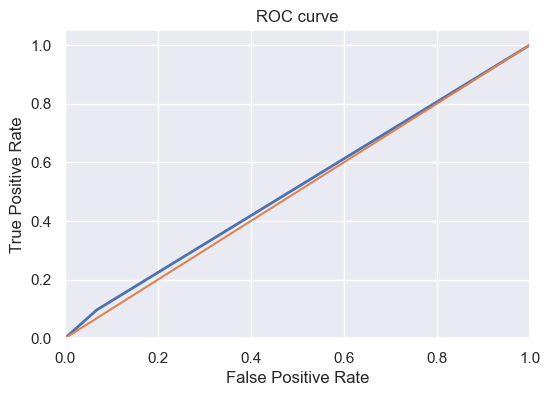

In [249]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## Gaussian Naive Bayes

In [214]:
# performance measurement
y_train_predict = gnb.predict(X_train)
y_test_predict = gnb.predict(X_test)

In [215]:
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.7816417910447762
test accuracy:  0.793939393939394


In [216]:
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))

test mean_squared_error:  0.20606060606060606
test mean_absolute_error:  0.20606060606060606


In [217]:
print('test precision_score: ', precision_score(y_test, y_test_predict))

test precision_score:  0.3669064748201439


In [218]:
print('test recall_score: ', recall_score(y_test, y_test_predict))

test recall_score:  0.07931570762052877


In [219]:
print('test f1_score: ', f1_score(y_test, y_test_predict))

test f1_score:  0.13043478260869565


In [220]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2657
           1       0.37      0.08      0.13       643

    accuracy                           0.79      3300
   macro avg       0.59      0.52      0.51      3300
weighted avg       0.73      0.79      0.74      3300



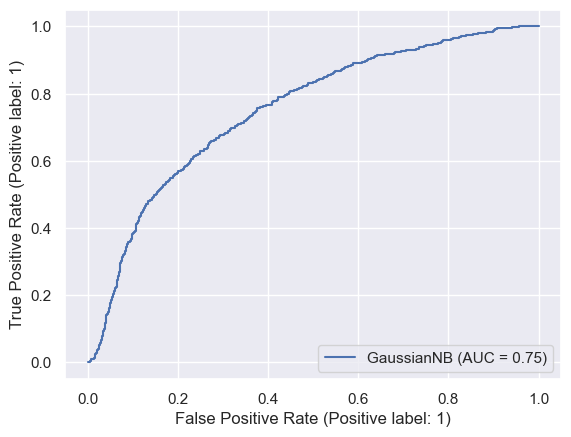

In [221]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

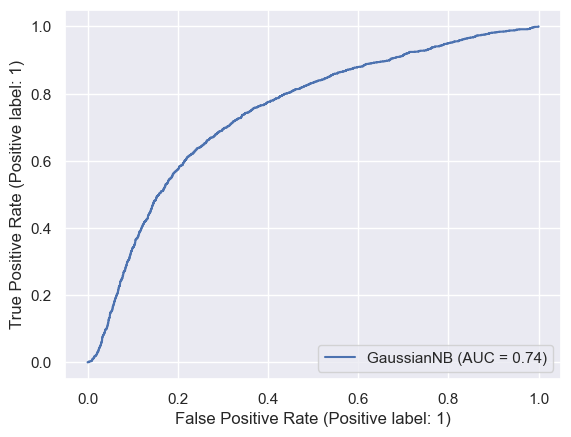

In [222]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_train, y_train)

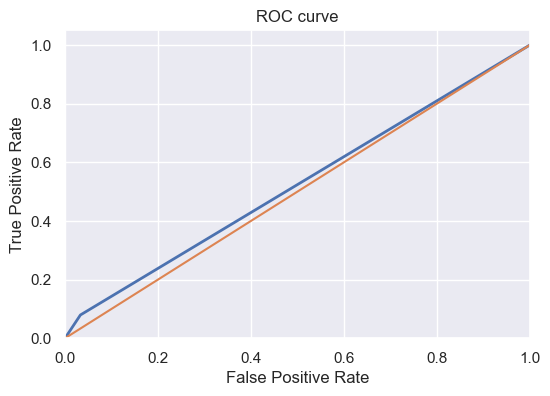

In [223]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## Random Forest Classifier

In [188]:
# performance measurement
y_train_predict = rfc.predict(X_train)
y_test_predict = rfc.predict(X_test)

In [189]:
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.8916417910447761
test accuracy:  0.8712121212121212


In [190]:
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))

test mean_squared_error:  0.12878787878787878
test mean_absolute_error:  0.12878787878787878


In [191]:
print('test precision_score: ', precision_score(y_test, y_test_predict))

test precision_score:  0.8044692737430168


In [192]:
print('test recall_score: ', recall_score(y_test, y_test_predict))

test recall_score:  0.447900466562986


In [193]:
print('test f1_score: ', f1_score(y_test, y_test_predict))

test f1_score:  0.5754245754245755


In [194]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.80      0.45      0.58       643

    accuracy                           0.87      3300
   macro avg       0.84      0.71      0.75      3300
weighted avg       0.86      0.87      0.86      3300



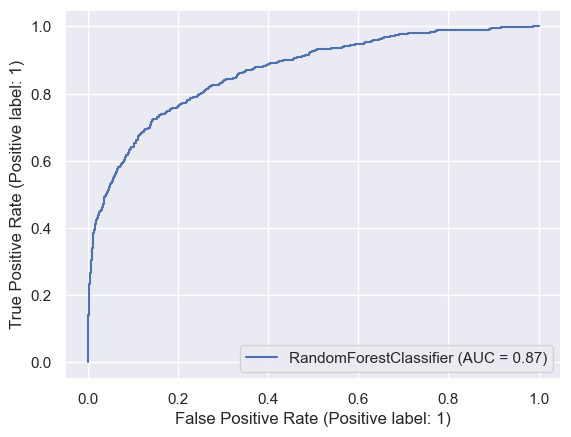

In [195]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

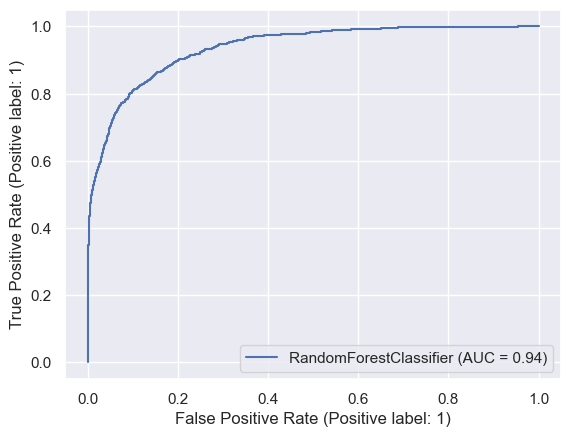

In [196]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_train, y_train)

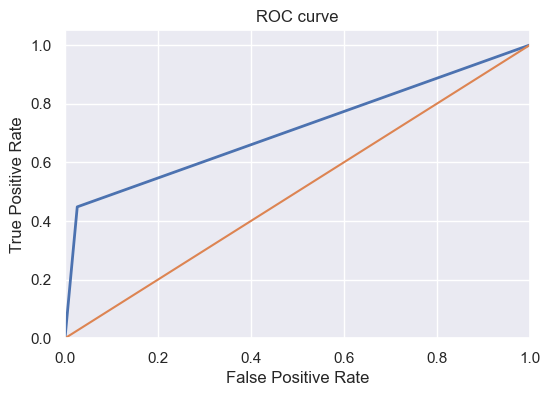

In [197]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## Logistic Regression

In [163]:
# performance measurement
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

In [164]:
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.8097014925373134
test accuracy:  0.8115151515151515


In [165]:
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))

test mean_squared_error:  0.18848484848484848
test mean_absolute_error:  0.18848484848484848


In [166]:
print('test precision_score: ', precision_score(y_test, y_test_predict))

test precision_score:  0.5428571428571428


In [167]:
print('test recall_score: ', recall_score(y_test, y_test_predict))

test recall_score:  0.20684292379471228


In [168]:
print('test f1_score: ', f1_score(y_test, y_test_predict))

test f1_score:  0.29954954954954954


In [169]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2657
           1       0.54      0.21      0.30       643

    accuracy                           0.81      3300
   macro avg       0.69      0.58      0.60      3300
weighted avg       0.78      0.81      0.78      3300



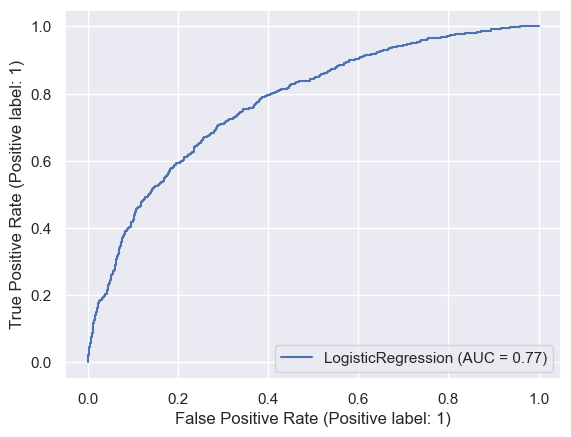

In [170]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

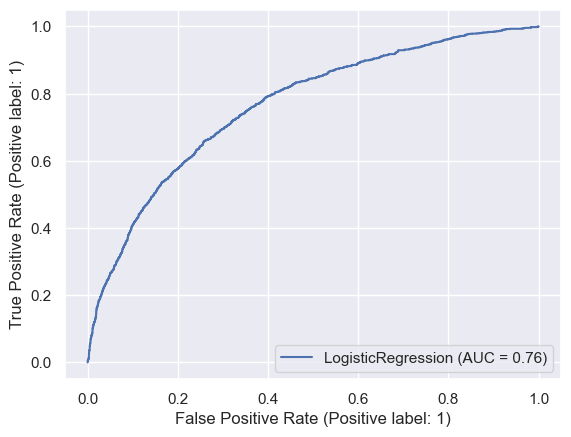

In [171]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_train, y_train)

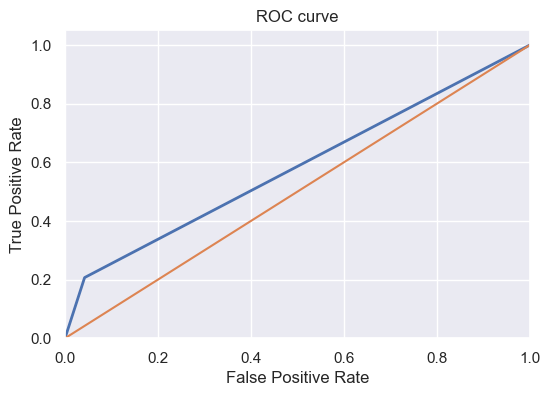

In [172]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## Вывод:

Лучшей моделью обучения стала Random Forest Classifier - 87% предсказания:

Точность(Accuracy) - 87%

Доля ошибочных классификаций - 13%

Точность(Recall) - 80%

Полнота - 45%